ТЕОРЕТИЧЕСКИЙ РАСЧЁТ
Площадь квадрата: 100.00
Площадь колышка: 20.00 = 5/50 площади квадрата
Радиус колышка: R = √(S/π) = 2.523
Вероятность попадания: P = S_колышка / S_квадрата = 0.200
--------------------------------------------------
Число испытаний: 5000
Число попаданий: 1031
Эмпирическая вероятность: 0.2062
Абсолютная погрешность: |P_emp - P_theor| = 0.0062



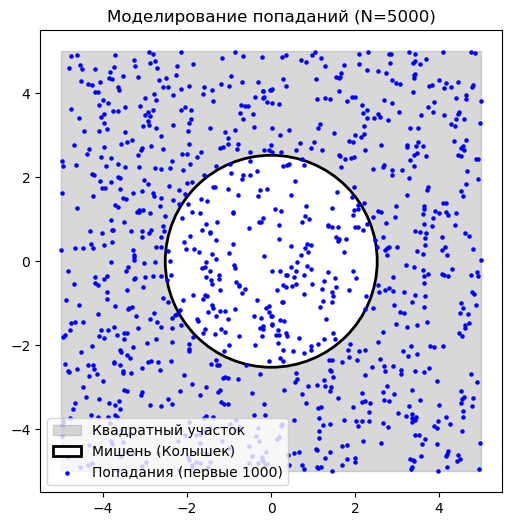

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 5000
side_a = 10.0
area_ratio = 0.2
S_square = side_a**2
S_circle = area_ratio * S_square
R = np.sqrt(S_circle / np.pi)

hits_x = np.random.uniform(-side_a/2, side_a/2, N)
hits_y = np.random.uniform(-side_a/2, side_a/2, N)

is_inside_circle = (hits_x**2 + hits_y**2) <= R**2

hits_count = np.sum(is_inside_circle)

simulated_probability = hits_count / N

theoretical_probability = area_ratio
absolute_error = abs(simulated_probability - theoretical_probability)

print("ТЕОРЕТИЧЕСКИЙ РАСЧЁТ")
print(f"Площадь квадрата: {S_square:.2f}")
print(f"Площадь колышка: {S_circle:.2f} = {int(1/area_ratio)}/{int(1/area_ratio)}0 площади квадрата")
print(f"Радиус колышка: R = √(S/π) = {R:.3f}")
print(f"Вероятность попадания: P = S_колышка / S_квадрата = {theoretical_probability:.3f}")
print("--------------------------------------------------")
print(f"Число испытаний: {N}")
print(f"Число попаданий: {hits_count}")
print(f"Эмпирическая вероятность: {simulated_probability:.4f}")
print(f"Абсолютная погрешность: |P_emp - P_theor| = {absolute_error:.4f}\n")

fig, ax = plt.subplots(figsize=(6, 6))

wall = plt.Rectangle((-side_a/2, -side_a/2), side_a, side_a, color='gray', fill=True, alpha=0.3, label='Квадратный участок')
ax.add_patch(wall)

circle = plt.Circle((0, 0), R, color='white', fill=True, ec='black', lw=2, label='Мишень (Колышек)')
ax.add_patch(circle)

sample_size = min(N, 1000)
ax.scatter(hits_x[:sample_size], hits_y[:sample_size], color='blue', s=5, label=f'Попадания (первые {sample_size})')

ax.set_xlim(-side_a/2 - 0.5, side_a/2 + 0.5)
ax.set_ylim(-side_a/2 - 0.5, side_a/2 + 0.5)
ax.set_aspect('equal', adjustable='box')
ax.legend()
ax.set_title(f'Моделирование попаданий (N={N})')
plt.show()

